In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Libs
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Data
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
full = pd.concat([train, test]).reset_index()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
index          1309 non-null int64
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


In [11]:
import seaborn as sns
sns.set_style("darkgrid")

In [12]:
#train[train['Survived']==1]['Sex'].value_counts().sort_index()

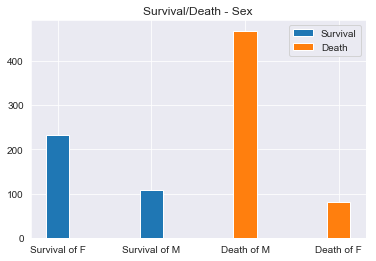

In [23]:
# Visualization
# Survival/Deatxh - Sex
survived_female, survived_male = train[train['Survived']==1]['Sex'].value_counts().sort_index()
dead_female, dead_male = train[train['Survived']==0]['Sex'].value_counts().sort_index()
width_bar= 0.25
plt.bar(['Survival of F','Survival of M'], [survived_female, survived_male], label='Survival', width=width_bar)
plt.bar(['Death of M','Death of F'], [dead_male, dead_female], label='Death', width=width_bar)

plt.title('Survival/Death - Sex')
plt.legend()

In [22]:
#plt.bar(['a','b','c'] , [20,30,40], 0.2)

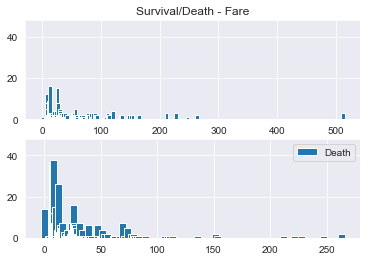

In [29]:
# Survival/Death - Fare
s_fare = train[train['Survived']==1]['Fare'].value_counts().sort_index()
d_fare = train[train['Survived']==0]['Fare'].value_counts().sort_index()
fig, ax = plt.subplots(2,1)


ax[0].bar(s_fare.index, s_fare, label='Survival', width=width_bar+6)        
ax[1].bar(d_fare.index, d_fare, label='Death', width=width_bar+6)

ax[0].set_ylim([0,full[full['Survived']==0]['Fare'].value_counts().max()+10])
ax[1].set_ylim([0,full[full['Survived']==0]['Fare'].value_counts().max()+10])
ax[0].title.set_text('Survival/Death - Fare')
plt.legend()
plt.show()

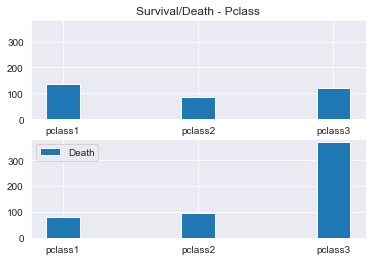

In [30]:
# Survival/Death - Pclass 
s_pclass1, s_pclass2, s_pclass3 = train[train['Survived']==1]['Pclass'].value_counts().sort_index()# survival of pclass 
d_pclass1, d_pclass2, d_pclass3 = train[train['Survived']==0]['Pclass'].value_counts().sort_index()

# Visualization
fig2, ax2 = plt.subplots(2,1)

ax2[0].bar(['pclass1', 'pclass2', 'pclass3'], [s_pclass1, s_pclass2, s_pclass3], label='Survival', width=width_bar)     
ax2[1].bar(['pclass1', 'pclass2', 'pclass3'], [d_pclass1, d_pclass2, d_pclass3], label='Death', width=width_bar)

ax2[0].title.set_text('Survival/Death - Pclass')

# Setting y-axis limit
ax2[0].set_ylim([0,full[full['Survived']==0]['Pclass'].value_counts().max()+10])
ax2[1].set_ylim([0,full[full['Survived']==0]['Pclass'].value_counts().max()+10])
plt.legend()
plt.show()

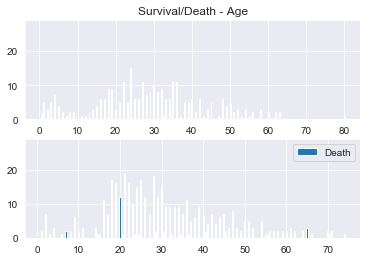

In [31]:
# Survival/Death - Age
s_age = train[train['Survived']==1]['Age'].value_counts().sort_index()# survival of age
d_age = train[train['Survived']==0]['Age'].value_counts().sort_index()

# Visualization
fig3, ax3 = plt.subplots(2,1)

ax3[0].bar(s_age.index, s_age, label='Survival', width=width_bar)     
ax3[1].bar(d_age.index, d_age, label='Death', width=width_bar)

ax3[0].title.set_text('Survival/Death - Age')

# Setting y-axis limit
ax3[0].set_ylim([0,full[full['Survived']==0]['Age'].value_counts().max()+10])
ax3[1].set_ylim([0,full[full['Survived']==0]['Age'].value_counts().max()+10])
plt.legend()
plt.show()

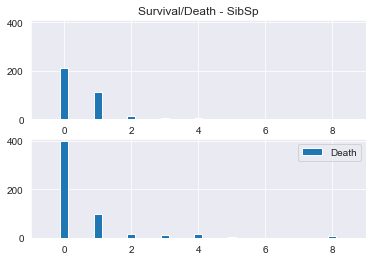

In [32]:
# Survival/Death - SibSp
s_sibsp = train[train['Survived']==1]['SibSp'].value_counts().sort_index()# survival of sibsp
d_sibsp = train[train['Survived']==0]['SibSp'].value_counts().sort_index()

# Visualization
fig4, ax4 = plt.subplots(2,1)

ax4[0].bar(s_sibsp.index, s_sibsp, label='Survival', width=width_bar)     
ax4[1].bar(d_sibsp.index, d_sibsp, label='Death', width=width_bar)

ax4[0].title.set_text('Survival/Death - SibSp')

# Setting y-axis limit
ax4[0].set_xlim([-1,9])
ax4[1].set_xlim([-1,9])
ax4[0].set_ylim([0,full[full['Survived']==0]['SibSp'].value_counts().max()+10])
ax4[1].set_ylim([0,full[full['Survived']==0]['SibSp'].value_counts().max()+10])

plt.legend()
plt.show()

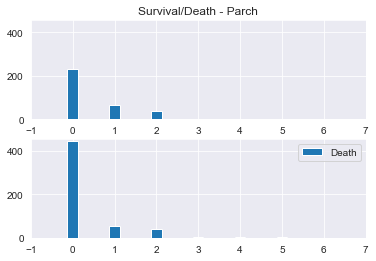

In [33]:
# Survival/Death - SibSp
s_parch = train[train['Survived']==1]['Parch'].value_counts().sort_index()# survival of parch
d_parch = train[train['Survived']==0]['Parch'].value_counts().sort_index()

# Visualization
fig5, ax5 = plt.subplots(2,1)

ax5[0].bar(s_parch.index, s_parch, label='Survival', width=width_bar)     
ax5[1].bar(d_parch.index, d_parch, label='Death', width=width_bar)

ax5[0].title.set_text('Survival/Death - Parch')

# Setting y-axis limit
ax5[0].set_xlim([-1,7])
ax5[1].set_xlim([-1,7])
ax5[0].set_ylim([0,full[full['Survived']==0]['Parch'].value_counts().max()+10])
ax5[1].set_ylim([0,full[full['Survived']==0]['Parch'].value_counts().max()+10])

plt.legend()
plt.show()

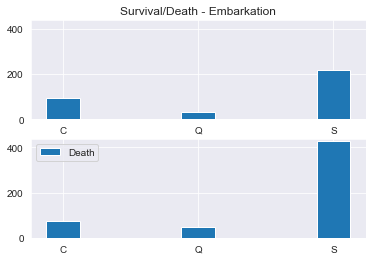

In [34]:
# Survival/Death - Embarkation
s_embark = train[train['Survived']==1]['Embarked'].value_counts().sort_index()# survival of embarkation
d_embark = train[train['Survived']==0]['Embarked'].value_counts().sort_index()

# Visualization
fig6, ax6 = plt.subplots(2,1)

ax6[0].bar(s_embark.index, s_embark, label='Survival', width=width_bar)     
ax6[1].bar(d_embark.index, d_embark, label='Death', width=width_bar)

ax6[0].title.set_text('Survival/Death - Embarkation')

# Setting y-axis limit
#ax6[0].set_xlim([-1,7])
#ax6[1].set_xlim([-1,7])
ax6[0].set_ylim([0,full[full['Survived']==0]['Embarked'].value_counts().max()+10])
ax6[1].set_ylim([0,full[full['Survived']==0]['Embarked'].value_counts().max()+10])

plt.legend()
plt.show()

In [38]:
# Handling data for the model
# For Sex
sex_map = {'female':1, 'male':2}
full['dummy_sex'] = full['Sex'].map(sex_map)

# For Name Title
full['Title_of_the_name'] = full.Name.str.extract('([A-Za-z]+)\.')
title_mapping = {'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master' : 4,'Don': 4, 'Rev' : 4,'Dr' : 4,'Mme': 4, 'Ms': 4, 'Major': 4,
 'Lady': 4, 'Sir': 4, 'Mlle': 4, 'Col': 4, 'Capt': 4, 'Countess': 4, 'Jonkheer': 4,'Dona': 4}

full['Title'] = full['Title_of_the_name'].map(title_mapping)
full['Title'] = full['Title'].fillna(0)
full['Title'].value_counts()

C:\Users\Melody\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  import sys


1    757
3    260
2    197
4     95
Name: Title, dtype: int64

In [39]:
#full.head()

In [40]:
full.drop(['Title_of_the_name', 'Sex'], axis=1, inplace=True)
full.rename(columns={'dummy_sex':'Sex'}, inplace=True)

# filling missing age based on title and the pclass
full['Age'] = full.groupby(['Title', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [41]:
full.drop(['Cabin'], axis=1, inplace=True)


In [42]:
full.Age=  full.Age.astype(int)

In [43]:
full['FamSize'] = full['SibSp'] + full['Parch'] + 1

In [44]:
full.drop(['index'], axis=1, inplace=True)

In [45]:
full.Embarked.fillna('S', inplace=True)

In [46]:
full.Fare.fillna(full['Fare'].median(), inplace=True)

In [47]:
full.Embarked = full.Embarked.map({'S':1, 'C':2, 'Q':3})

In [48]:
full.drop(['Name','SibSp','Parch','Ticket'],axis=1, inplace=True)

In [49]:
full.drop('PassengerId',axis=1, inplace=True)

In [50]:
#normalize Data
full.Age = full['Age']/full.Age.max()
full.Fare = full['Fare']/full.Fare.max()

In [51]:
# After handling data we split them again into train and test
# Train dataset
train = full[ :len(train)+1]
# Test dataset
test = full[len(train): ]
test.drop('Survived',axis=1, inplace=True)

C:\Users\Melody\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
#train.Survived = train.Survived.astype(int)
train.Title.isnull().sum()
#train.Survived.fillna(1.0, inplace=True)
train.head()

,Age,Embarked,Fare,Pclass,Survived,Sex,Title,FamSize
0,0.2750,1,0.014151,3,0.0,2,1,2
1,0.4750,2,0.139136,1,1.0,1,2,2
2,0.3250,1,0.015469,3,1.0,1,3,1
3,0.4375,1,0.103644,1,1.0,1,2,2
4,0.4375,1,0.015713,3,0.0,2,1,1


In [53]:
# preparing model
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [54]:
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               1650      
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [55]:
history = model.fit(train.drop('Survived', axis=1), train['Survived'], validation_split=0.2, epochs=180, shuffle=True)


Train on 713 samples, validate on 179 samples
Epoch 1/180
713/713 [==============================] - 1s 924us/step - loss: 0.2490 - accuracy: 0.5750 - val_loss: nan - val_accuracy: 0.6480
Epoch 2/180
713/713 [==============================] - 0s 90us/step - loss: 0.2332 - accuracy: 0.6297 - val_loss: nan - val_accuracy: 0.7095
Epoch 3/180
713/713 [==============================] - 0s 88us/step - loss: 0.2231 - accuracy: 0.6648 - val_loss: nan - val_accuracy: 0.7709
Epoch 4/180
713/713 [==============================] - 0s 94us/step - loss: 0.2151 - accuracy: 0.6914 - val_loss: nan - val_accuracy: 0.7374
Epoch 5/180
713/713 [==============================] - 0s 95us/step - loss: 0.1969 - accuracy: 0.7195 - val_loss: nan - val_accuracy: 0.8045
Epoch 6/180
713/713 [==============================] - 0s 105us/step - loss: 0.1917 - accuracy: 0.7349 - val_loss: nan - val_accuracy: 0.7765
Epoch 7/180
713/713 [==============================] - 0s 98us/step - loss: 0.1928 - accuracy: 0.7307 - v

In [66]:
acc = history.history['accuracy']
epoch = history.epoch

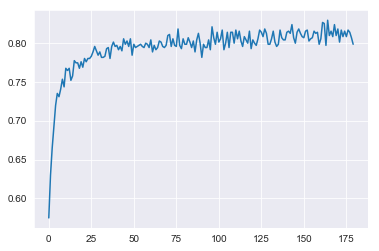

In [69]:
plt.plot(acc)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


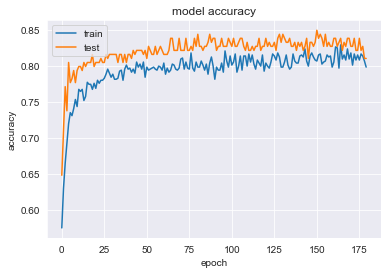

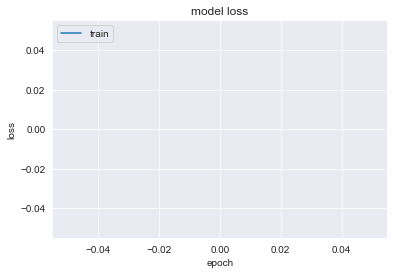

In [72]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(test).round().astype(int)
pred

In [ ]:
pred = pred.reshape(417,)
pred

In [ ]:
passengerId= test.index.values
df = pd.DataFrame({'PassengerId': passengerId, 'Survived': pred})


In [ ]:
df.to_csv('submission.csv', index=False)